# import modules

In [1]:
# imports
import pandas as pd
import numpy as np

# full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas format
pd.set_option('display.float_format', '{:_.0f}'.format)
# NOTE: underscore separaters ('_') are better than commas (',') because 
# numbers with underscores work in Python without any extra effort.
pd.set_option('display.max_columns', None)

# import data

In [2]:
# entire database in one dataframe (df for simplicity)
df = pd.read_csv('RV_DATABASE.csv', dtype={'MATURITY':object, 'STRAT':object})

In [3]:
# individual tables used to define the database
SPECIES = pd.read_csv('SPECIES.csv', index_col = 'index')
SPECIES.columns = ['SPEC', 'COMMON_NAME', 'SCIENTIFIC_NAME']
MISSIONS = pd.read_csv('MISSIONS.csv')
GSCAT = pd.read_csv('GSCAT.csv')
GSINF = pd.read_csv('GSINF.csv', index_col='date and time')
GSINF.index.name = 'DATETIME'
GSDET = pd.read_csv('GSDET.csv')

In [4]:
df.head()

DATETIME  SEASON     MISSION  SETNO  TOTWGT  TOTNO  SPEC  \
0  1970-07-06 18:25:00  SUMMER  ATC1970175      1      59     12    10   
1  1970-07-06 18:25:00  SUMMER  ATC1970175      1      59     12    10   
2  1970-07-06 18:25:00  SUMMER  ATC1970175      1      59     12    10   
3  1970-07-06 18:25:00  SUMMER  ATC1970175      1      59     12    10   
4  1970-07-06 18:25:00  SUMMER  ATC1970175      1      59     12    10   

     COMMON_NAME SCIENTIFIC_NAME  FLEN   FWT  MATURITY     SEX  AGE  \
0  COD(ATLANTIC)    GADUS MORHUA    28   220  Immature    MALE    2   
1  COD(ATLANTIC)    GADUS MORHUA    58 2_000   Resting  FEMALE  NaN   
2  COD(ATLANTIC)    GADUS MORHUA    64 3_000  Immature  FEMALE  NaN   
3  COD(ATLANTIC)    GADUS MORHUA    68 3_600   Resting    MALE    4   
4  COD(ATLANTIC)    GADUS MORHUA    69 3_200   Resting    MALE    5   

   SPECIMEN_ID STRAT  SLAT  SLONG  ELAT  ELONG  DUR  DIST  SPEED  DEPTH  \
0          NaN   492    45    -67   NaN    NaN   30     2      5     86   
1          NaN   492    45    -67   NaN    NaN   30     2      5     86   
2          NaN   492    45    -67   NaN    NaN   30     2      5     86   
3          NaN   492    45    -67   NaN    NaN   30     2      5     86   
4          NaN   492    45    -67   NaN    NaN   30     2      5     86   

   SURF_TEMP  BOTT_TEMP  BOTT_SAL                GEARDESC VESEL  CRUNO  YEAR  
0          9          7        32  Yankee #36 otter trawl     A    175  1970  
1          9          7        32  Yankee #36 otter trawl     A    175  1970  
2          9          7        32  Yankee #36 otter trawl     A    175  1970  
3          9          7        32  Yankee #36 otter trawl     A    175  1970  
4          9          7        32  Yankee #36 otter trawl     A    175  1970

In [5]:
df.shape

(2346739, 31)

# EDA

In [9]:
haul_weights = df[['DATETIME', 'MISSION', 'SETNO', 'TOTWGT', 'TOTNO', 'SPEC', 'COMMON_NAME']].drop_duplicates()

In [19]:
# cod
cod_weights = haul_weights[haul_weights.SPEC == 10]
cod_weights.shape

(10065, 7)

<AxesSubplot:xlabel='DATETIME'>

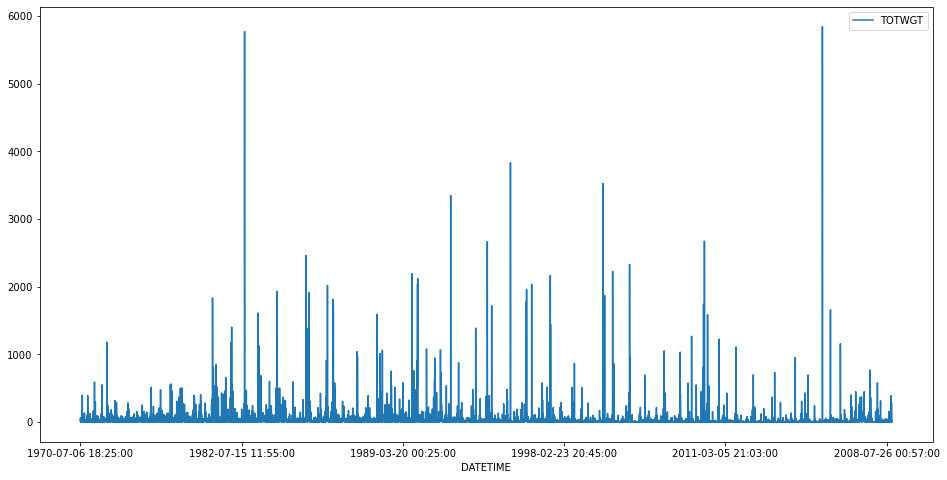

In [21]:
cod_weights.plot(x='DATETIME', y='TOTWGT', figsize=(16, 8))

In [22]:
cod_weights.head(50)

DATETIME     MISSION  SETNO  TOTWGT  TOTNO  SPEC  \
0    1970-07-06 18:25:00  ATC1970175      1      59     12    10   
12   1970-07-07 22:45:00  ATC1970175      2      36     10    10   
22   1970-07-07 06:25:00  ATC1970175      4       2      1    10   
23   1970-07-07 15:25:00  ATC1970175      6       0      2    10   
25   1970-07-08 21:15:00  ATC1970175      8      56      8    10   
33   1970-07-08 02:15:00  ATC1970175      9      38     23    10   
56   1970-07-08 13:15:00  ATC1970175     12       5      1    10   
57   1970-07-08 19:45:00  ATC1970175     14      29      5    10   
62   1970-07-09 06:45:00  ATC1970175     17      14      7    10   
69   1970-07-09 11:05:00  ATC1970175     18      39     11    10   
80   1970-07-10 22:05:00  ATC1970175     20      33      7    10   
87   1970-07-10 07:15:00  ATC1970175     22      10      1    10   
88   1970-07-10 10:55:00  ATC1970175     23       0      1    10   
89   1970-07-10 14:25:00  ATC1970175     24      32     11    10   
100  1970-07-10 20:15:00  ATC1970175     26      33     13    10   
113  1970-07-11 22:35:00  ATC1970175     27      35      9    10   
122  1970-07-11 01:05:00  ATC1970175     28       5      3    10   
125  1970-07-11 03:35:00  ATC1970175     29      17      9    10   
134  1970-07-11 07:05:00  ATC1970175     30       5      1    10   
135  1970-07-11 09:35:00  ATC1970175     31     132     44    10   
179  1970-07-11 11:35:00  ATC1970175     32       7      4    10   
183  1970-07-11 14:55:00  ATC1970175     33       4      3    10   
186  1970-07-11 17:35:00  ATC1970175     34       5      1    10   
187  1970-07-12 04:05:00  ATC1970175     36      35     16    10   
203  1970-07-12 06:45:00  ATC1970175     37     123     35    10   
238  1970-07-12 11:15:00  ATC1970175     38     398    167    10   
405  1970-07-12 14:35:00  ATC1970175     39      38     12    10   
417  1970-07-12 19:25:00  ATC1970175     41      11      6    10   
423  1970-07-13 22:15:00  ATC1970175     42      13      2    10   
425  1970-07-13 07:35:00  ATC1970175     45       4      5    10   
430  1970-07-13 09:25:00  ATC1970175     46       6      4    10   
434  1970-07-13 12:15:00  ATC1970175     47      24      8    10   
442  1970-07-13 16:35:00  ATC1970175     49       2      1    10   
443  1970-07-13 19:55:00  ATC1970175     50       2      1    10   
444  1970-07-14 22:25:00  ATC1970175     51       8     15    10   
459  1970-07-14 01:45:00  ATC1970175     52       5      4    10   
463  1970-07-14 08:55:00  ATC1970175     54      15      3    10   
466  1970-07-14 10:45:00  ATC1970175     55      10      3    10   
469  1970-07-15 01:25:00  ATC1970175     59       4     12    10   
481  1970-07-15 03:35:00  ATC1970175     60       4      9    10   
490  1970-07-15 10:55:00  ATC1970175     62       2     21    10   
511  1970-07-15 12:45:00  ATC1970175     63       2      9    10   
520  1970-07-15 14:45:00  ATC1970175     64       3      3    10   
523  1970-07-16 01:25:00  ATC1970175     68      15      4    10   
527  1970-07-16 05:45:00  ATC1970175     69      46     12    10   
539  1970-07-20 07:25:00  ATC1970176      1       5     12    10   
551  1970-07-20 13:45:00  ATC1970176      3     107    101    10   
652  1970-07-20 16:05:00  ATC1970176      4      19     15    10   
667  1970-07-20 20:15:00  ATC1970176      5       1      4    10   
671  1970-07-21 23:05:00  ATC1970176      6       7     10    10   

       COMMON_NAME  
0    COD(ATLANTIC)  
12   COD(ATLANTIC)  
22   COD(ATLANTIC)  
23   COD(ATLANTIC)  
25   COD(ATLANTIC)  
33   COD(ATLANTIC)  
56   COD(ATLANTIC)  
57   COD(ATLANTIC)  
62   COD(ATLANTIC)  
69   COD(ATLANTIC)  
80   COD(ATLANTIC)  
87   COD(ATLANTIC)  
88   COD(ATLANTIC)  
89   COD(ATLANTIC)  
100  COD(ATLANTIC)  
113  COD(ATLANTIC)  
122  COD(ATLANTIC)  
125  COD(ATLANTIC)  
134  COD(ATLANTIC)  
135  COD(ATLANTIC)  
179  COD(ATLANTIC)  
183  COD(ATLANTIC)  
186  COD(ATLANTIC)  
187  COD(ATLANTIC)  
203  COD(ATLANTIC)  
2